# Kmeans
* Kmeansは教師なし学習の1つ。クラスタリングの手法。
* データの近さを元に、指定したK個のクラスに分類する。
* まずは、サンプルのデータを作成する。

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

X = np.array([[1,1],[1,2],[2,1],
             [4,1],[5,1],[4,2],
             [2,5],[2,6],[3,6]])

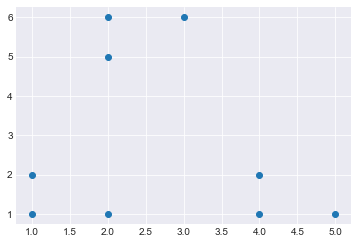

In [2]:
plt.scatter(X[:,0],X[:,1])

* 上の表を見ると、上と左下と右下に3つのグループがあるように見える。これを機械的に3つに分類する。
* アルゴリズムとしては下記。K=3とする。
    1. K個のサンプルを適当に取り出し、それぞれをクラスA,B,Cとする。
    2. 余ったサンプルを、1で分類したサンプルのうち、どれに最も近いのか調べる。
    3. 最も近いクラスに分類する。
    4. クラスA,B,Cごとで平均A',B',C'を取る。
    5. 全サンプルを、A_m、B_m,C_mのどれに最も近いのか調べ、最も平均の近いクラスA,B,Cに分類する。
    6. 平均が動かなくなるまで、4~5を繰り返す。
* 実行したのが下記。

In [3]:
kmeans = KMeans(n_clusters=3, init="random", random_state=0).fit(X)
kmeans.labels_

array([2, 2, 2, 1, 1, 1, 0, 0, 0], dtype=int32)

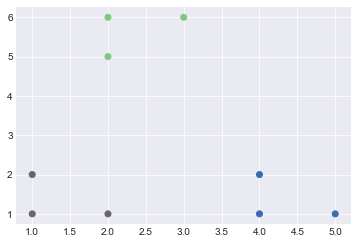

In [4]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='Accent')

* 上記を見ると、人間の感覚と同じように3つに分類できている。
* ただし、上記ではK=3の指定は恣意的に行ってしまっている。Kの数の決め方としては[エルボー法](https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2#%E3%82%A8%E3%83%AB%E3%83%9C%E3%83%BC%E6%B3%95)などがある。

# 関連手法
## k-means++
* 初期値で設定する値をなるべく広げて取るように計算する手法。
* k-meansよりも安定的な結果。
* sklearnでは、KMeansメソッドの`init`に`k-means++`を設定すれば動く。（デフォルト値も`k-means++`）

## k-medoids
* k-meansはクラスのサンプルの平均値を次の中心点に用いている。
* k-medoidsは中央値を用いる。そのため、中心点が実在する点を取る。
* k-medoisの方が、外れ値による影響が少なくなる。
* `sklearn`に実装されてないため、自分で実装する必要がある。

## シルエット分析
* クラス内のサンプルがどの程度密にグループされているかをグラフにすることで、適切なクラス数を把握する。
* 別途追記